# Model uppercase characters and score NIST dataset
    - Create a model only with uppercase charactes of the new character database. 
    - Evaluate it in a test partition
    - Use the previous trained model to score the TICH test database (database only of uppercase characters)
    - Use the previous trained model to score the uppercase characters of NIST test database

In [1]:
path = '/home/jorge/data/tesis/handwriting/databases/unipen/'

import numpy as np
import pandas as pd
#import cv2

from scipy.misc import imresize, imrotate, imsave 


import matplotlib.pyplot as plt

# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'              # use grayscale output color heatmap


In [2]:
#
#Select the subset of characters
#
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

def prepare_data_char_subset(X, y, char_select):
    '''
    Definition: Create train test data to model it
        - Select cases
        - shuffle
        - separate train test
        - encode target to dummy vars
    Parameters:
        X: images[n_images, x_size, y_size]
        y: characters[n_images, 1]
        char_select: list of characters selected
        augmentation_fuction
    
    usage:
        prepare_data_char_subset(X, y, set(['1','0']), augmentation_fuction = lambda: augmentate01(param1, param2=p2) )
        
    return:
        X_train, y_train, X_test, y_test, labels_dictionary
    '''
    #Select cases
    X_select = []
    y_select = []
    for row in xrange(X.shape[0]):
        if y[row] in set(char_select):
            X_select += [X[row,:,:]]
            y_select += y[row]
    X_select = np.array(X_select, dtype = np.float16)
    y_select = np.array(y_select)
    print 'Shape of selected cases:', X_select.shape, y_select.shape
    
    
    #Shuffle
    X_select, y_select = shuffle(X_select, y_select, random_state=0)
    
    #Reescale
    X_select = X_select/255.
    
    #Recode target
    decode_target={}
    encode_target={}
    for i,c in enumerate(char_select):
        decode_target[i] = c 
        encode_target[c] = i
    y_select = np.array([encode_target[y] for y in y_select])
    

    #Separate train test
    X_train, X_test, y_train_ini, y_test_ini = train_test_split(X_select, y_select, test_size=0.20, random_state=42)
    X_train = np.reshape(X_train,  (X_train.shape[0],1,X_train.shape[1],X_train.shape[2]))
    X_test = np.reshape(X_test,  (X_test.shape[0],1,X_test.shape[1],X_test.shape[2]))
    
    print 'Train shape: ',X_train.shape, y_train_ini.shape
    print 'Test shape: ',X_test.shape, y_test_ini.shape
    print 'Num classes: ', len(set(y_train_ini))
    print 'Classes:', set(y_train_ini)
    
    return X_train, y_train_ini, X_test, y_test_ini, decode_target


In [3]:
#Load data from hdf5
import h5py

hdf5_f = h5py.File(path + "characters_base_64x64.hdf5", mode='r')

X = hdf5_f["X_curated_chars"]
y = hdf5_f["y_curated_chars"]
y_chars = np.array(y)
print(X.shape, y.shape)


char_select = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
               'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

X_train_u, y_train_u, X_test_u, y_test_u, decode_target_u = prepare_data_char_subset(X, y, char_select)
print(X_train_u.shape, X_test_u.shape)

char_select = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
               'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

X_train_l, y_train_l, X_test_l, y_test_l, decode_target_l = prepare_data_char_subset(X, y, char_select)
print(X_train_l.shape, X_test_l.shape)

hdf5_f.close()

((46102, 64, 64), (46102,))
Shape of selected cases: (16257, 64, 64) (16257,)
Train shape:  (13005, 1, 64, 64) (13005,)
Test shape:  (3252, 1, 64, 64) (3252,)
Num classes:  26
Classes: set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
((13005, 1, 64, 64), (3252, 1, 64, 64))
Shape of selected cases: (29845, 64, 64) (29845,)
Train shape:  (23876, 1, 64, 64) (23876,)
Test shape:  (5969, 1, 64, 64) (5969,)
Num classes:  26
Classes: set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
((23876, 1, 64, 64), (5969, 1, 64, 64))


In [4]:
print(decode_target_u)
print(X_train_u[0,:,32,:])
print(y_test_u[:5])

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}
[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.38818359  1.          1.          0.01960754  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[ 2  7 10 20 15]


## Uppercase model


In [5]:
#
# Uppercase model
#

from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import SGD

print('Build model 1...')
input_images = Input(shape=(1, 64, 64))

c11 = Convolution2D(64, 3, 3, border_mode='same', activation='relu')(input_images)
c12 = Convolution2D(64, 3, 3, border_mode='same', activation='relu')(c11)
c1_mp = MaxPooling2D((2, 2))(c12)

c21 = Convolution2D(128, 3, 3, border_mode='same', activation='relu')(c1_mp)
c22 = Convolution2D(128, 3, 3, border_mode='same', activation='relu')(c21)
c2_mp = MaxPooling2D((2, 2))(c22)

c31 = Convolution2D(256, 3, 3, border_mode='same', activation='relu')(c2_mp)
c32 = Convolution2D(256, 3, 3, border_mode='same', activation='relu')(c31)
c33 = Convolution2D(256, 3, 3, border_mode='same', activation='relu')(c32)
c3_mp = MaxPooling2D((2, 2))(c33)

conv_out = Flatten()(c3_mp)

dense1 = Dense(1024, activation='relu')(conv_out)
after_dp1 = Dropout(0.5)(dense1)

dense2 = Dense(1024, activation='relu')(after_dp1)
after_dp2 = Dropout(0.5)(dense2)

output = Dense(26, activation='softmax')(after_dp2)

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN Black (CNMeM is disabled, cuDNN 5103)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:599: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


Build model 1...


In [6]:
#Data augmentation in keras
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 15,       # 15º of random rotation
    width_shift_range = 0.20,  # 20% of random translation width
    height_shift_range = 0.20, # 20% of random translation height
    shear_range = 0.15,        # 5º of shear
    zoom_range = 0.20)         # +- 20% of zoom 



In [7]:
# Create the model
model_u = Model(input=input_images, output=output)

#Fit model  on batches with real-time data augmentation:
sgd = SGD(lr=0.01, decay=0.001, momentum=0.9, nesterov=True)
model_u.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

hist_u_1 = model_u.fit_generator(datagen.flow(X_train_u, y_train_u, batch_size=128),
                    samples_per_epoch=len(X_train_u), nb_epoch=100, 
                    validation_data=(X_test_u, y_test_u))

print 'Done!'

Epoch 1/100
13005/13005 [==============================] - 42s - loss: 3.2193 - acc: 0.0734 - val_loss: 3.1313 - val_acc: 0.0781
Epoch 2/100
13005/13005 [==============================] - 47s - loss: 2.9292 - acc: 0.1614 - val_loss: 1.8011 - val_acc: 0.5391
Epoch 3/100
13005/13005 [==============================] - 47s - loss: 2.1690 - acc: 0.3561 - val_loss: 0.7979 - val_acc: 0.7808
Epoch 4/100
13005/13005 [==============================] - 47s - loss: 1.4647 - acc: 0.5491 - val_loss: 0.5146 - val_acc: 0.8604
Epoch 5/100
13005/13005 [==============================] - 47s - loss: 1.1181 - acc: 0.6577 - val_loss: 0.3541 - val_acc: 0.9182
Epoch 6/100
13005/13005 [==============================] - 47s - loss: 0.9203 - acc: 0.7171 - val_loss: 0.2613 - val_acc: 0.9311
Epoch 7/100
13005/13005 [==============================] - 47s - loss: 0.7777 - acc: 0.7639 - val_loss: 0.2218 - val_acc: 0.9413
Epoch 8/100
13005/13005 [==============================] - 47s - loss: 0.7259 - acc: 0.7817 - val

# Accuracy for UNIPEN upper case: 98.4%

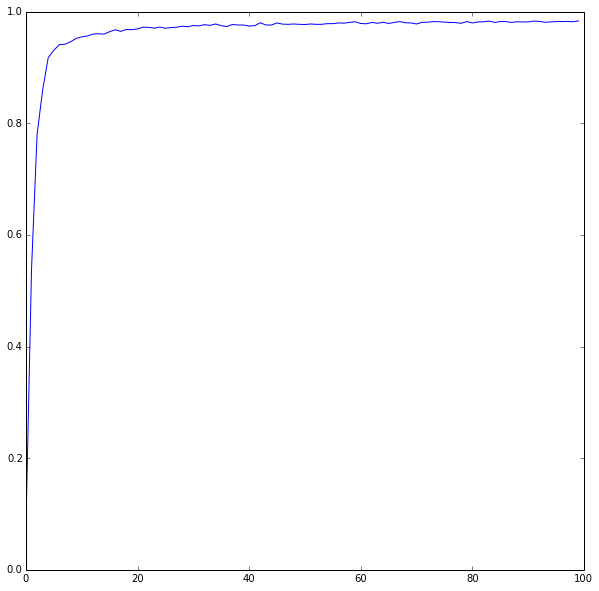

In [8]:
plt.plot(hist_u_1.history['val_acc'])

In [51]:
#Save model
path_models = '/home/jorge/data/tesis/handwriting/p01_read_character/'

model_name = 'unipen_uppercase_01'

json_string = model_u.to_json()
open(path_models + 'models/mdl_' + model_name + '.json', 'w').write(json_string)
model_u.save_weights(path_models + 'models/w_' + model_name + '.h5', overwrite=True)

# Save decode_target
import pickle
pickle.dump( decode_target_u, open( path_models + "models/unipen_decode_target_uppercase.p", "wb" ) )

## Use the model trained to score the TICH dataset

In [52]:
#Load model
from keras.models import model_from_json

model_name = 'unipen_uppercase_01'

model_u = model_from_json(open(path_models + 'models/mdl_' + model_name + '.json').read())
model_u.load_weights(path_models + 'models/w_' + model_name + '.h5')

# Load the dictionary back from the pickle file.
import pickle
decode_target = pickle.load( open(path_models + "models/unipen_decode_target_uppercase.p", "rb" ) )
    



In [10]:
#Read TICH
path_TICH = '/home/jorge/data/tesis/handwriting/databases/TICH/digits/'

labels = pd.read_csv(path_TICH + 'labels.txt', header=None, names=['target'])
train  = pd.read_csv(path_TICH + 'train.txt', header=None, delimiter=' ', names=['file','target_code'])
valid  = pd.read_csv(path_TICH + 'valid.txt', header=None, delimiter=' ', names=['file','target_code'])

In [11]:
# Select uppercase, target code: >=10
# Create X_train(image 64x64), Y_train(sparse target 26 ), X_valid y_valid
# Not X. Put it -->  Recode target t = tc-10 if tc<33 else t=tc-9

def exctrac_TICH(ds):
    X_TICH = []
    y_TICH = []
    for i,row in train[:].iterrows():
        if row.target_code>=10:
            img_name = row.file.split('/')[-1]
            img = plt.imread(path_TICH + 'imgs/'+img_name)
            X_TICH += [img]
            y_TICH += [row.target_code-10 if row.target_code<33 else row.target_code-9]

    return np.array(X_TICH), np.array(y_TICH)


In [12]:
X_TICH_trn, y_TICH_trn = exctrac_TICH(train)

print(X_TICH_trn.shape)
print(y_TICH_trn.shape)

(29186, 64, 64)
(29186,)


In [13]:
X_TICH_val, y_TICH_val = exctrac_TICH(valid)

print(X_TICH_val.shape)
print(y_TICH_val.shape)

(29186, 64, 64)
(29186,)


In [14]:
print(X_TICH_trn[0,12,:])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00392157  0.00784314
  0.03921569  0.08627451  0.13333334  0.35686275  0.5529412   0.67058825
  0.74117649  0.81176472  0.8509804   0.72549021  0.57254905  0.37254903
  0.07843138  0.01960784  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]


In [ ]:
y_pred = model_u.predict(X_TICH_trn[0:10].reshape((10, 1, 64, 64)), batch_size=10)
print y_pred

In [16]:
print(y_TICH_val[:10])

[ 0  3  7  0 17  3 11  4 18  3]


In [17]:
y_pred = model_u.predict(X_TICH_trn.reshape((29186, 1, 64, 64)), batch_size=128)
print(y_pred.shape)


(29186, 26)


In [ ]:
print(y_pred[0])

In [19]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_TICH_val, np.argmax(y_pred, axis=1)))



0.925786335914


# Accuracy for TICH database: 0.9258

# Use the previous created model to score NIST database

In [20]:
#Read NIST dataset 
path_NIST='/home/jorge/data/tesis/handwriting/databases/NIST/by_class/'


char_list_up = ['41','42','43','44','45','46','47','48','49','4a','4b','4c','4d',
                '4e','4f','50','51','52','53','54','55','56','57','58','59','5a']
           
char_list_lo = ['61','62','63','64','65','66','67','68','69','6a','6b','6c','6d'
               ,'6e','6f','70','71','72','73','74','75','76','77','78','79','7a']

print(str(unichr(int('41',16))))
print(str(unichr(int('5a',16))))

decode_up={}
encode_up={}
for i , c in enumerate(char_list_up):
    char = str(unichr(int(c,16)))
    decode_up[i] = char
    encode_up[char] = i
print decode_up               


decode_lo={}
encode_lo={}
for i , c in enumerate(char_list_lo):
    char = str(unichr(int(c,16)))
    decode_lo[i] = char
    encode_lo[char] = i
print decode_lo               


A
Z
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'}


In [21]:
# Generator of list of files in a folder and subfolders
import os
import shutil
import fnmatch

def gen_find(filepat,top):
    for path, dirlist, filelist in os.walk(top):
        for name in fnmatch.filter(filelist,filepat):
            yield os.path.join(path,name)

In [47]:
hsf='/hsf_4/'

#Read test dataset
X_NIST_up=[]
y_NIST_up=[]
for char in char_list_up:
    letter = str(unichr(int(char,16)))
    images_list = gen_find("*.png", path_NIST+char+hsf) 
    for img_name in images_list:
        img = plt.imread(img_name)
        
        #Transform
        img = img[32:96,32:96,0]
        
        X_NIST_up += [img]
        y_NIST_up += [encode_up[letter]]

X_NIST_up = 1. - np.array(X_NIST_up)
y_NIST_up = np.array(y_NIST_up)
        
print(X_NIST_up.shape)
print(y_NIST_up.shape)

(11941, 64, 64)
(11941,)


In [48]:
print(X_NIST_up[0,32,:])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [49]:
y_pred = model_u.predict(X_NIST_up.reshape((11941, 1, 64, 64)), batch_size=128)
print(y_pred.shape)


(11941, 26)


In [50]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_NIST_up, np.argmax(y_pred, axis=1)))

0.92915166234


# Accuracy for NIST database (2nd ed) upper case: 92,9%
    - The low score can be explained because the NIST database is binary (pixels only 0 or 1).
    - We need to train the same architecture over the NIST database in order to obtain a better comparation to others.